In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# Load the dataset
df = pd.read_csv("/Users/georgepaul/Desktop/bayesian-proposal-1/synthetic-data-apple/timeseries-data/apple-supplier-timeseries.csv")

# Preview
df.head()

,Supplier_ID,Country,Sector,Year,Renewable_Energy_%,Emissions_Scope1_tCO2e,Emissions_Scope2_tCO2e,Emissions_Scope3_tCO2e,Data_Confidence,Recycled_Materials_%,Traceability_Score
0,SUP00001,USA,Textiles,2020,65,630,805,6875,0.83,25,0.87
1,SUP00001,USA,Textiles,2021,69,557,898,6616,0.88,29,0.92
2,SUP00001,USA,Textiles,2022,71,603,862,6828,0.83,29,0.87
3,SUP00001,USA,Textiles,2023,64,604,932,7025,0.87,36,0.92
4,SUP00001,USA,Textiles,2024,71,665,1089,7792,0.82,22,0.86


In [4]:
# Shape and column info
print("Shape:", df.shape)
print("\nInfo:")
df.info()

# Descriptive statistics
df.describe(include='all')

Shape: (2500, 11)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Supplier_ID             2500 non-null   object 
 1   Country                 2500 non-null   object 
 2   Sector                  2500 non-null   object 
 3   Year                    2500 non-null   int64  
 4   Renewable_Energy_%      2500 non-null   int64  
 5   Emissions_Scope1_tCO2e  2500 non-null   int64  
 6   Emissions_Scope2_tCO2e  2500 non-null   int64  
 7   Emissions_Scope3_tCO2e  2500 non-null   int64  
 8   Data_Confidence         2500 non-null   float64
 9   Recycled_Materials_%    2500 non-null   int64  
 10  Traceability_Score      2500 non-null   float64
dtypes: float64(2), int64(6), object(3)
memory usage: 215.0+ KB


,Supplier_ID,Country,Sector,Year,Renewable_Energy_%,Emissions_Scope1_tCO2e,Emissions_Scope2_tCO2e,Emissions_Scope3_tCO2e,Data_Confidence,Recycled_Materials_%,Traceability_Score
count,2500,2500,2500,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.00000,2500.000000
unique,500,8,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,SUP00001,India,Packaging,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,5,375,450,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,2022.000000,38.584000,357.464400,842.857600,10363.973600,0.651336,28.61800,0.652324
std,NaN,NaN,NaN,1.414496,24.110352,246.832046,430.696811,4041.059724,0.155810,17.71684,0.150189
min,NaN,NaN,NaN,2020.000000,0.000000,-85.000000,-21.000000,3222.000000,0.250000,0.00000,0.300000
25%,NaN,NaN,NaN,2021.000000,17.000000,112.000000,524.750000,6937.750000,0.540000,14.00000,0.537500
50%,NaN,NaN,NaN,2022.000000,39.000000,351.000000,780.000000,10818.000000,0.650000,28.00000,0.650000
75%,NaN,NaN,NaN,2023.000000,60.000000,575.000000,1308.250000,14692.250000,0.770000,42.00000,0.770000


#### Missing values and data quality check

In [5]:
# Missing values
df.isnull().sum()

# Check for duplicates
df.duplicated().sum()

0

#### Emissions distribution by scope

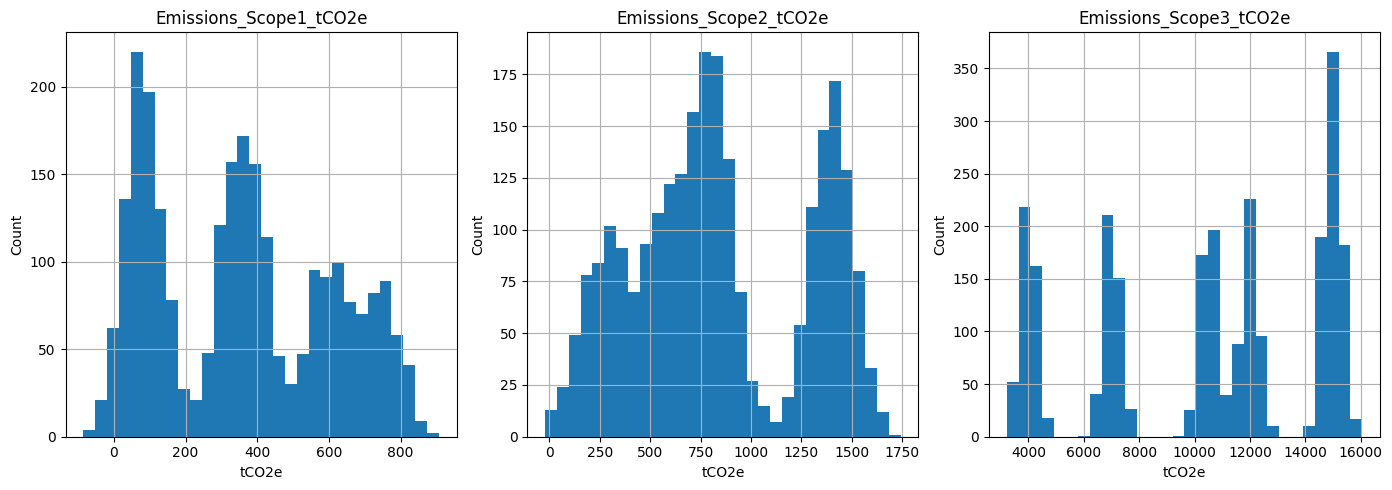

In [6]:
plt.figure(figsize=(14, 5))

for i, scope in enumerate(['Emissions_Scope1_tCO2e', 'Emissions_Scope2_tCO2e', 'Emissions_Scope3_tCO2e']):
    plt.subplot(1, 3, i+1)
    df[scope].hist(bins=30)
    plt.title(scope)
    plt.xlabel("tCO2e")
    plt.ylabel("Count")

plt.tight_layout()
plt.show()

#### Emissions by Country

<Axes: title={'center': 'Average Emissions by Country'}, xlabel='Country'>

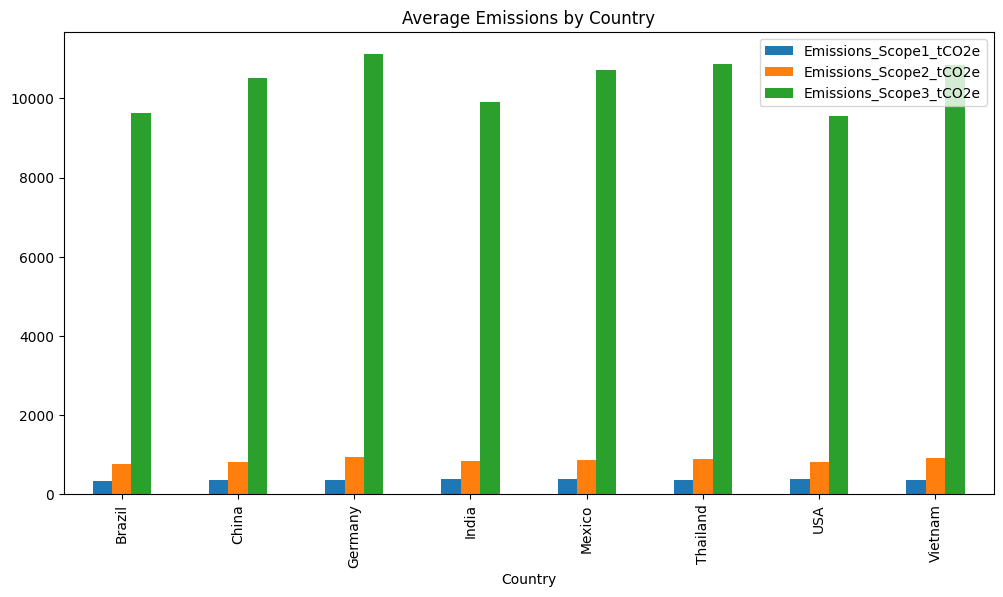

In [7]:
emissions_by_country = df.groupby('Country')[['Emissions_Scope1_tCO2e', 'Emissions_Scope2_tCO2e', 'Emissions_Scope3_tCO2e']].mean()
emissions_by_country.plot(kind='bar', figsize=(12, 6), title="Average Emissions by Country")